In [3]:
!pip install qiskit
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 95.1 MB/s eta 0:00:00


In [ ]:
# Quantum RNG using Qiskit – Explained Step-by-Step

from qiskit import QuantumCircuit
from qiskit_aer import QasmSimulator
import matplotlib.pyplot as plt

Random Bits: [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
As Integer: 58643
As Hex: 0xe513


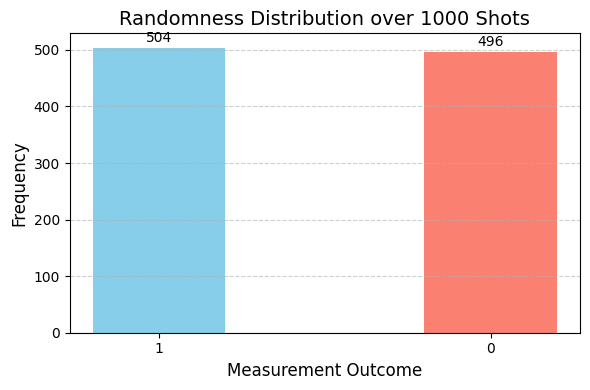

In [9]:


# STEP 1: Define the quantum circuit
# - 1 qubit + 1 classical bit
# - Apply Hadamard gate to put the qubit into a superposition
# - Measure the result into the classical bit

def create_rng_circuit():
    qc = QuantumCircuit(1, 1)
    qc.h(0)            # Hadamard gate creates equal superposition
    qc.measure(0, 0)   # Collapses to |0⟩ or |1⟩ randomly
    return qc

# STEP 2: Generate a single random bit
# - Run the circuit with 1 shot
# - Use QasmSimulator to simulate measurement

def generate_random_bit():
    qc = create_rng_circuit()
    simulator = QasmSimulator()
    job = simulator.run(qc, shots=1)
    result = job.result()
    counts = result.get_counts()
    return int(list(counts.keys())[0])  # Extract 0 or 1 from result

# STEP 3: Generate multiple random bits
# - Run the above circuit repeatedly for `n` bits

def generate_random_bits(n):
    return [generate_random_bit() for _ in range(n)]

# STEP 4: Visualize output distribution for many samples
# - Run the same quantum circuit `shots` times
# - Use matplotlib to create a customized bar chart of counts

def visualize_rng_distribution(shots=1000):
    qc = create_rng_circuit()
    simulator = QasmSimulator()
    job = simulator.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(counts.keys(), counts.values(), width=0.4, color=['skyblue', 'salmon'])

    ax.set_title(f"Randomness Distribution over {shots} Shots", fontsize=14)
    ax.set_xlabel("Measurement Outcome", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6, axis='y')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{int(yval)}',
                ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# PRACTICAL APPLICATION
# ----------------------
# This kind of RNG is based on true quantum randomness.
# Useful in applications like:
# - Cryptography (e.g., quantum key generation)
# - Probabilistic simulations
# - Fair lotteries or games
# - Randomized algorithms

if __name__ == '__main__':
    # Generate and display 16 random bits
    bits = generate_random_bits(16)
    print("Random Bits:", bits)

    # Convert to integer and hex for practical use
    as_integer = int("".join(map(str, bits)), 2)
    print("As Integer:", as_integer)
    print("As Hex:", hex(as_integer))

    # Visualize the distribution across many runs
    visualize_rng_distribution()

In [ ]:
s